In [14]:
from branca.element import Figure
import pygeohash as gh
import folium
from folium import plugins
#from mpl_toolkits.basemap import Basemap
import googlemaps
from googlemaps import convert
from geopy.geocoders import Nominatim
from pygeocoder import Geocoder
from geopy.distance import vincenty
from collections import Counter 
from bs4 import BeautifulSoup
import urllib.request
import datetime
import json
import numpy as np
import scipy.stats
import pandas as pd
import matplotlib
import matplotlib.pyplot as pp
import pandas.plotting
from IPython import display
from ipywidgets import interact, widgets
import re
import csv
#from collections import defauldict
import googlemaps
%matplotlib inline

In [15]:
df = pd.read_csv('train.csv')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
id                    1458644 non-null object
vendor_id             1458644 non-null int64
pickup_datetime       1458644 non-null object
dropoff_datetime      1458644 non-null object
passenger_count       1458644 non-null int64
pickup_longitude      1458644 non-null float64
pickup_latitude       1458644 non-null float64
dropoff_longitude     1458644 non-null float64
dropoff_latitude      1458644 non-null float64
store_and_fwd_flag    1458644 non-null object
trip_duration         1458644 non-null int64
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


From the Infos, we can see that we do not have any missing data. All columns have non-null data type.

In [17]:
df.head()

id  vendor_id      pickup_datetime     dropoff_datetime  \
0  id2875421          2  2016-03-14 17:24:55  2016-03-14 17:32:30   
1  id2377394          1  2016-06-12 00:43:35  2016-06-12 00:54:38   
2  id3858529          2  2016-01-19 11:35:24  2016-01-19 12:10:48   
3  id3504673          2  2016-04-06 19:32:31  2016-04-06 19:39:40   
4  id2181028          2  2016-03-26 13:30:55  2016-03-26 13:38:10   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.982155        40.767937         -73.964630   
1                1        -73.980415        40.738564         -73.999481   
2                1        -73.979027        40.763939         -74.005333   
3                1        -74.010040        40.719971         -74.012268   
4                1        -73.973053        40.793209         -73.972923   

   dropoff_latitude store_and_fwd_flag  trip_duration  
0         40.765602                  N            455  
1         40.731152                  N            663  
2         40.710087                  N           2124  
3         40.706718                  N            429  
4         40.782520                  N            435

In [19]:
# Function that calculates the distance from the geocoordinates.
def distance(x1, y1, x2, y2):
    dist = []
    for i in range(len(x1)):
        dist.append(vincenty((x1[i], y1[i]), (x2[i], y2[i])).miles)
    return dist

In [20]:
#Applying the distance function
df['Geo_Distance/mi'] = distance(df.pickup_latitude, df.pickup_longitude, 
                                 df.dropoff_latitude, df.dropoff_longitude)
Geo_dist_Mean = df['Geo_Distance/mi'].mean()
print("The mean of the Geodistance = ", Geo_dist_Mean, "miles")

/Users/youcefiratni/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Vincenty is deprecated and is going to be removed in geopy 2.0. Use `geopy.distance.geodesic` (or the default `geopy.distance.distance`) instead, which is more accurate and always converges.
  """


The mean of the Geodistance =  2.1388794358091707 miles


In [21]:
# Function that calculates the Speed Using the Geodistance/Not the driving ditance.
def speed(X, Y):
    spd = []
    for i in range(len(X)):
        spd.append(float((X[i]*3600)/Y[i]))
    return spd

In [22]:
#Applying the Speed function
#Speed = speed(df['Geo_Distance/mi'], df['trip_duration'])
df['Geo_Speed(mi/h)'] = speed(df['Geo_Distance/mi'], df['trip_duration'])
Geo_Speed_Mean = df['Geo_Speed(mi/h)'].mean()
print("The mean of the Geo-Speed = ", Geo_Speed_Mean, "mile/hour")

The mean of the Geo-Speed =  8.96394310977404 mile/hour


In [23]:
#Creating a column for the duration in minutes
df['trip_duration/min'] = df['trip_duration']/60

In [24]:
#Creating a function that returns a dataFrame for trips picked up from JFK Airport
def jfk_df_pick(data):
    JFK_df_Pick = data[(data.pickup_longitude >= -73.810081) & 
                         (data.pickup_longitude <= -73.768667) & 
                         (data.pickup_latitude >=40.633117)& 
                         (data.pickup_latitude <=40.664635)]
    return JFK_df_Pick

JFK_df_Pick = jfk_df_pick(df)
len(JFK_df_Pick)

32027

In [25]:
#Creating a function that returns a dataFrame for trips dropped off at JFK Airport
def jfk_df_drop(data):
    JFK_df_Drop = data[(data.dropoff_longitude >= -73.810081) & 
                         (data.dropoff_longitude <= -73.768667) & 
                         (data.dropoff_latitude >=40.633117)& 
                         (data.dropoff_latitude <=40.664635)]
    return JFK_df_Drop

JFK_df_Drop = jfk_df_drop(df)
len(JFK_df_Drop)

12710

In [26]:
#Creating a function that returns a dataFrame for trips picked up from Laguardia Airport
def lga_df_pick(data):
    LGA_df_Pick = data[(data.pickup_longitude >= -73.886304) & 
                         (data.pickup_longitude <= -73.856019) & 
                         (data.pickup_latitude >=40.765803)& 
                         (data.pickup_latitude <=40.779908)]
    return LGA_df_Pick

LGA_df_Pick = lga_df_pick(df)
len(LGA_df_Pick)

36939

In [27]:
#Creating a function that returns a dataFrame for trips dropped off at Laguardia Airport
def lga_df_drop(data):
    LGA_df_Drop = data[(data.dropoff_longitude >= -73.886304) & 
                         (data.dropoff_longitude <= -73.856019) & 
                         (data.dropoff_latitude >=40.765803)& 
                         (data.dropoff_latitude <=40.779908)]
    return LGA_df_Drop

LGA_df_Drop = lga_df_drop(df)
len(LGA_df_Drop)

18020

In [28]:
#Creating a Columns for the GeoHash Coordinates
df['GeoHash_Pick']=df.apply(lambda x: gh.encode(x.pickup_latitude, x.pickup_longitude, precision=6), axis=1)
df['GeoHash_Drop']=df.apply(lambda x: gh.encode(x.dropoff_latitude, x.dropoff_longitude, precision=6), axis=1)

In [29]:
#Function that returns a dataframe of trips less than 4 minutes
def less_than_4min(data):
    data_less_4min = data[data.trip_duration < 240]
    return data_less_4min

df_0_4 = less_than_4min(df)
len(df_0_4)

138811

In [30]:
#Function that returns a dataframe of trips between 4 minutes and 30 minutes 
def min4_30min(data):
    data_4_30 = data[(data.trip_duration >= 240) & (data.trip_duration < 1800)]
    return data_4_30

df_4_30 = min4_30min(df)
len(df_4_30)

1206520

In [31]:
#Function that returns a dataframe of trips between 30 minutes and 1 hour
def min30_60min(data):
    data_30_1h = data[(data.trip_duration >= 1800) & (data.trip_duration < 3600)]
    return data_30_1h

df_30_60 = min30_60min(df)
len(df_30_1h)

100979

In [32]:
#Function that returns a dataframe of trips between 1 hour and 1.5 hour
def min60_90min(data):
    data_1h_90 = data[(data.trip_duration >= 3600) & (data.trip_duration < 5400)]
    return data_1h_90

df_60_90 = min60_90min(df)
len(df_60_90)

9235

In [33]:
#Function that returns a dataframe of trips more than 1.5 hour
def more_90min(data):
    data_More_90 = data[data.trip_duration >= 5400]
    return data_More_90

df_More_90 = more_90min(df)
len(df_More_90)

3099

In [34]:
#GeoHashing Coordinates
Manhattan = ['dr5rec', 'dr5re9', 'dr5red', 'dr5ref', 'dr5ree', 'dr5reg', 'dr5rs5', 'dr5rs4', 'dr5res',
 'dr5reu', 'dr5rsh', 'dr5rs7', 'dr5rse', 'dr5rsj', 'dr5rsm', 'dr5rst', 'dr5rsh', 'dr5rsk', 
 'dr5rss', 'dr5rev', 'dr5reu', 'dr5rez', 'dr5rsp', 'dr5rsr', 'dr5rey', 'dr5rsn', 'dr5rsq', 
'dr5rsx', 'dr5rsw', 'dr5ru1', 'dr5ru3', 'dr5ru9', 'dr5ru0', 'dr5ru2', 'dr5ru8', 'dr5rgc', 
 'dr5rgb', 'dr5rgg', 'dr5ru5', 'dr5ru7', 'dr5rgf', 'dr5ru4', 'dr5ru6', 'dr5ruh', 'dr5ruk', 
 'dr5rus', 'dr5rue', 'dr5rud', 'dr5rug', 'dr5ruf', 'dr5ruu', 'dr5rvh', 'dr5ruw', 'dr5ruy', 
 'dr5rvn', 'dr5rut', 'dr5ruv', 'dr5rvj', 'dr5ruq', 'dr5rum', 'dr5ruj', 'dr5run', 'dr5rvq', 
 'dr72hb', 'dr72j0', 'dr72j2', 'dr5ruz', 'dr5rvp', 'dr5rvr', 'dr72h8', 'dr5rux', 'dr72h2', 
'dr5rur', 'dr72hd', 'dr72hf', 'dr72j4', 'dr72h9', 'dr72hc', 'dr72j1', 'dr72j6', 'dr72j3', 
'dr72j9', 'dr72jd', 'dr72jh', 'dr72jk', 'dr72js', 'dr72j5', 'dr72j7', 'dr72je', 'dr72hg', 
'dr72hu', 'dr72he', 'dr72hs']
LGA_Airport = ['dr5ryx', 'dr5ryz', 'dr5rzp', 'dr5ryw', 'dr5ryy', 'dr5rzn', 'dr5rzj', 'dr5rzm',
              'dr5rzq', ]
JFK_Airport = ['dr5x0r', 'dr5x0x', 'dr5x0w', 'dr5x0z', 'dr5x0y', 'dr5x0v', 'dr5x1n', 'dr5x1j', 
              'dr5x1p', 'dr5x28', 'dr5x2b', 'dr5x30', 'dr5x29', 'dr5x2c', 'dr5x31', 'dr5x22', 
               'dr5x23', 'dr5x24', 'dr5x26', 'dr5x2d', 'dr5x2f']

In [35]:
#Creating a column for the pick up place
df['Place_Pick'] = df.apply(lambda x: 'Manhattan' if x['GeoHash_Pick'] in Manhattan 
                            else 'JFK Airport' if x['GeoHash_Pick'] in JFK_Airport 
                            else 'LGA Airport' if x['GeoHash_Pick'] in LGA_Airport
                            else 'other', axis=1)

In [36]:
#Creating a column for the drop-off place
df['Place_Drop'] = df.apply(lambda x: 'Manhattan' if x['GeoHash_Drop'] in Manhattan 
                            else 'JFK Airport' if x['GeoHash_Drop'] in JFK_Airport 
                            else 'LGA Airport' if x['GeoHash_Drop'] in LGA_Airport
                            else 'other', axis=1)

In [37]:
df.head()

id  vendor_id      pickup_datetime     dropoff_datetime  \
0  id2875421          2  2016-03-14 17:24:55  2016-03-14 17:32:30   
1  id2377394          1  2016-06-12 00:43:35  2016-06-12 00:54:38   
2  id3858529          2  2016-01-19 11:35:24  2016-01-19 12:10:48   
3  id3504673          2  2016-04-06 19:32:31  2016-04-06 19:39:40   
4  id2181028          2  2016-03-26 13:30:55  2016-03-26 13:38:10   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.982155        40.767937         -73.964630   
1                1        -73.980415        40.738564         -73.999481   
2                1        -73.979027        40.763939         -74.005333   
3                1        -74.010040        40.719971         -74.012268   
4                1        -73.973053        40.793209         -73.972923   

   dropoff_latitude store_and_fwd_flag  trip_duration  Geo_Distance/mi  \
0         40.765602                  N            455         0.933406   
1         40.731152                  N            663         1.123849   
2         40.710087                  N           2124         3.964154   
3         40.706718                  N            429         0.921886   
4         40.782520                  N            435         0.737591   

   Geo_Speed(mi/h)  trip_duration/min GeoHash_Pick GeoHash_Drop Place_Pick  \
0         7.385193           7.583333       dr5rum       dr5ruv  Manhattan   
1         6.102349          11.050000       dr5ru8       dr5rsn  Manhattan   
2         6.718905          35.400000       dr5rus       dr5reg  Manhattan   
3         7.736110           7.150000       dr5reu       dr5ref  Manhattan   
4         6.104201           7.250000       dr72hd       dr72h8  Manhattan   

  Place_Drop  
0  Manhattan  
1  Manhattan  
2  Manhattan  
3  Manhattan  
4  Manhattan

In [38]:
df.describe()

vendor_id  passenger_count  pickup_longitude  pickup_latitude  \
count  1.458644e+06     1.458644e+06      1.458644e+06     1.458644e+06   
mean   1.534950e+00     1.664530e+00     -7.397349e+01     4.075092e+01   
std    4.987772e-01     1.314242e+00      7.090186e-02     3.288119e-02   
min    1.000000e+00     0.000000e+00     -1.219333e+02     3.435970e+01   
25%    1.000000e+00     1.000000e+00     -7.399187e+01     4.073735e+01   
50%    2.000000e+00     1.000000e+00     -7.398174e+01     4.075410e+01   
75%    2.000000e+00     2.000000e+00     -7.396733e+01     4.076836e+01   
max    2.000000e+00     9.000000e+00     -6.133553e+01     5.188108e+01   

       dropoff_longitude  dropoff_latitude  trip_duration  Geo_Distance/mi  \
count       1.458644e+06      1.458644e+06   1.458644e+06     1.458644e+06   
mean       -7.397342e+01      4.075180e+01   9.594923e+02     2.138879e+00   
std         7.064327e-02      3.589056e-02   5.237432e+03     2.672057e+00   
min        -1.219333e+02      3.218114e+01   1.000000e+00     0.000000e+00   
25%        -7.399133e+01      4.073588e+01   3.970000e+02     7.656939e-01   
50%        -7.397975e+01      4.075452e+01   6.620000e+02     1.301179e+00   
75%        -7.396301e+01      4.076981e+01   1.075000e+03     2.407637e+00   
max        -6.133553e+01      4.392103e+01   3.526282e+06     7.708173e+02   

       Geo_Speed(mi/h)  trip_duration/min  
count     1.458644e+06       1.458644e+06  
mean      8.963943e+00       1.599154e+01  
std       9.308955e+00       8.729053e+01  
min       0.000000e+00       1.666667e-02  
25%       5.669644e+00       6.616667e+00  
50%       7.949700e+00       1.103333e+01  
75%       1.108864e+01       1.791667e+01  
max       5.766065e+03       5.877137e+04

In [42]:
#Creating a df for trips picked up from Manhattan only (the island)
Manhattan_Pick_df = df[df.Place_Pick == 'Manhattan']
len(Manhattan_Pick_df)

1332647

In [43]:
#Creating a df for trips dropped off in Manhattan only (the island)
Manhattan_Drop_df = df[df.Place_Drop == 'Manhattan']
len(Manhattan_Drop_df)

1259912

In [44]:
#Creating a df for trips picked up and dropped off in Manhattan only (the island)
Pick_Drop_Manhattan = df[(df.Place_Drop == 'Manhattan') & (df.Place_Pick == 'Manhattan')]
len(Pick_Drop_Manhattan)

1198921

In [53]:
#Creating a df for trips picked up from JKF Airport 
JFK_Pick_df = df[df.Place_Pick == 'JFK Airport']
len(JFK_Pick_df)

32063

In [54]:
#Creating a df for trips dropped off at JKF Airport 
JFK_Drop_df = df[df.Place_Drop == 'JFK Airport']
len(JFK_Drop_df)

12812

In [55]:
#Creating a df for trips picked up from Laguardia Airport
LGA_Pick_df = df[df.Place_Pick == 'LGA Airport']
len(LGA_Pick_df)

36836

In [56]:
#Creating a df for trips dropped off at Laguardia Airport
LGA_Drop_df = df[df.Place_Drop == 'LGA Airport']
len(LGA_Drop_df)

17888

In [47]:
#Creating a df for trips picked up from other locations
Other_Pick_df = df[df.Place_Pick == 'other']
len(Other_Pick_df)

57098

In [57]:
#Creating a df for trips dropped off at other locations
Other_Drop_df = df[df.Place_Drop == 'other']
len(Other_Drop_df)

168032

In [59]:
#Creating a df for trips picked up and dropped of at other locations
Other_Pick_Drop_df = df[(df.Place_Pick == 'other') & (df.Place_Drop == 'other')]
len(Other_Pick_Drop_df)

37447

In [48]:
#Using Folium to polt the pick-up Latitude-Longitude on the New Yor map
Map_Pick_More_90=folium.Map(location=[40.654568, -73.845481], zoom_start=11.4, width=1000, height=1000)
df_More_90.apply(lambda row: folium.CircleMarker(location=[row['pickup_latitude'], row['pickup_longitude']], radius=0.1, color='#3186cc', fill=True, fill_color='#3186cc').add_to(Map_Pick_More_90), axis=1)
Map_Pick_More_90

In [49]:
#Using Folium to polt the Drop-off Lat-Long on the New Yor map
Map_Drop_More_90=folium.Map(location=[40.654568, -73.845481], zoom_start=11.4, width=1000, height=1000)
df_More_90.apply(lambda row: folium.CircleMarker(location=[row['dropoff_latitude'], row['dropoff_longitude']], 
                                                 radius=0.1, color='#3186cc', fill=True, fill_color='#3186cc').add_to(Map_Drop_More_90), axis=1)
Map_Drop_More_90

In [50]:
#Creating a dataFrame for JFK trips more than 1.5 hour
JFK_More_90 = df_More_90[(df_More_90.pickup_longitude >= -73.810081) & 
                         (df_More_90.pickup_longitude <= -73.768667) & 
                         (df_More_90.pickup_latitude >=40.633117)& 
                         (df_More_90.pickup_latitude <=40.664635)]
len(JFK_More_90)

553

In [51]:
#Using Folium to polt the trips picked from JFK & more than 90min, just testing folium
Map_JFK_More_90=folium.Map(location=[40.620836, -73.776409], zoom_start=13, width=1000, height=1000)
JFK_More_90.apply(lambda row: folium.CircleMarker(location=[row['pickup_latitude'], row['pickup_longitude']], 
                                                  radius=0.1, color='#3186cc', fill=True, fill_color='#3186cc').add_to(Map_JFK_More_90), axis=1)
Map_JFK_More_90

In [79]:
#Creating a DataFrame for Manhattan trips between 4min-30min
Manhattan_4_30 = min4_30min(Pick_Drop_Manhattan)
len(Manhattan_4_30)

1039695

In [82]:
Manhattan_4_30['Geo_Distance/mi'].mean(), Manhattan_4_30['Geo_Speed(mi/h)'].mean(), Manhattan_4_30['trip_duration/min'].mean()

(1.465380807501896, 7.784069551314615, 11.788679035679069)

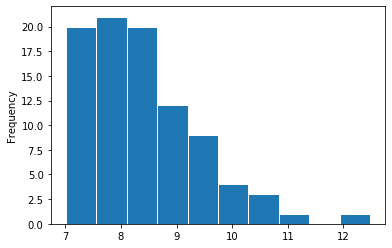

In [83]:
Manhattan_4_30.groupby('GeoHash_Pick')['Geo_Speed(mi/h)'].mean().plot(kind='hist',
                                                                                edgecolor='white', bins=10)

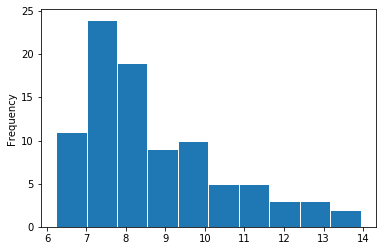

In [84]:
Manhattan_4_30.groupby('GeoHash_Drop')['Geo_Speed(mi/h)'].mean().plot(kind='hist',
                                                                                edgecolor='white', bins=10)